# Linear Regression 2: 기온 예측 프로그램

## Q

1월부터 12월까지의 기온이 

5.2, 5.7, 8.6, 14.9, 18.2, 20.4, 25.5, 26.4, 22.8, 17.5, 11.1, 6.6

일 때, 기온을 예측하는 선형 회귀 프로그램을 작성하시오.

---


위 데이터를 토대로 완만한 곡선을 그려본다면, 올해의 기온도
이 곡선에 분포할 가능성이 높다고 볼 수 있다.

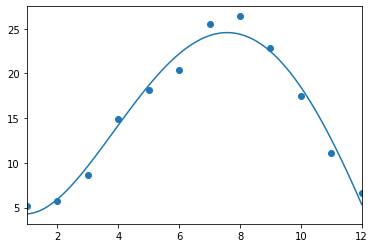




---



위의 완만한 그래프는 아래와 같은 함수로 표현된다고 가정해보자.

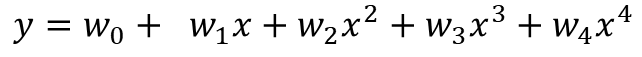

이 때 x= 1, 2, 3, 4, 5, 6, ... , 12는 각각의 월을 나타내며, 위 식으로 계산된 y가 해당 월의 평균 기온이라고 하자. 

각 항의 계수 w를 잘 조절하면 위 그래프의 곡선과 같은 "그럴 듯한 완만한 곡선"을 얻을 수 있을 것이다.

이제 우리들의 목표는, w를 적당히 조절하여

5.2, 5.7, 8.6, 14.9, 18.2, 20.4, 25.5, 26.4, 22.8, 17.5, 11.1, 6.6

와 가장 가까운 결과를 내는, 완만한 곡선 함수 f(w, x)를 만드는 것이다.

> 즉, x=1 을 넣었을 때 1월의 온도와 가장 비슷한 y가 나오고,   
x=2 를 넣었을 때 가장 비슷한 2월의 온도가 나오고,   
x=3 을 넣었을 때 가장 비슷한 3월의 온도가 나오고,   
... 이렇게 만드는 w0, w1, w2, w3, w4를 구하는 것이 목표이다.

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

### 모델의 정의

- x : 계산에서 입력값을 받는 변수 (placeholder)
- w : 계산하면서 최적화 할 변수들 (Variable)

In [14]:
# training set 데이터를 저장할 Placeholder x
x = tf.placeholder(tf.float32, [None, 5]) # input 값으로 넣을 데이터. 1월부터 12월

In [15]:
# 최적화할 대상이 될 파라미터
w = tf.Variable(tf.zeros([5, 1]))  # weight w0, w1, w2, w3, w4

In [16]:
y = tf.matmul(x, w)

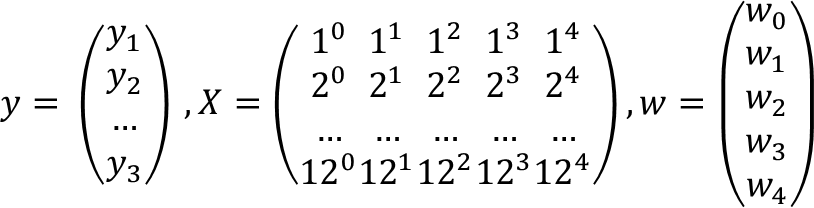

In [17]:
t = tf.placeholder(tf.float32, [None, 1])  # 실제로 관측된 기온 t

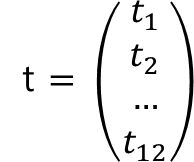

In [18]:
loss = tf.reduce_sum(tf.square(y-t))    # 손실함수

In [19]:
 # train_step = tf.train.GradientDescentOptimizer(learning_rate=0.1)
 train_step = tf.train.AdamOptimizer().minimize(loss)   # training 방법 정의

### Training 시작!

In [20]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

In [21]:
# 훈련에 참여시킬 데이터들 1월부터 12월까지의 기온
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4,
                    25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12,1])

train_x = np.zeros([12, 5])
for row, month in enumerate(range(1, 13)):      # x축 : 월
    for col, n in enumerate(range(0, 5)):       # y축 : 기온(계산값)
        train_x[row][col] = month**n            # 1부터 12까지 0~4제곱

In [22]:
i = 0
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    
    # 1000번마다 학습 현황 print 해주기
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print ('Step: %d, Loss: %f' % (i, loss_val))

Step: 10000, Loss: 31.033054
Step: 20000, Loss: 29.295877
Step: 30000, Loss: 28.028336
Step: 40000, Loss: 26.861082
Step: 50000, Loss: 26.942289
Step: 60000, Loss: 24.808706
Step: 70000, Loss: 23.841579
Step: 80000, Loss: 22.980118
Step: 90000, Loss: 22.432549
Step: 100000, Loss: 21.466858


최종적으로 나온 w값들

In [23]:
w_val = sess.run(w)
print(w_val)

[[ 3.7626748 ]
 [-1.5874788 ]
 [ 1.7844566 ]
 [-0.20113584]
 [ 0.00536442]]


In [24]:
# 그래프 그릴 때 사용할
# x월의 기온을 예측한 값을 return하는 함수 작성 
def predict(x):
    result = 0.0
    for n in range(0, 5):
        result += w_val[n][0] * x**n
    return result

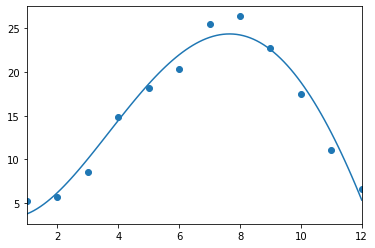

In [25]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)        # add_subplot(x y n) 세로에 x개 가로에 y개 나열된 그래프의 n번째 위치
subplot.set_xlim(1,12)                  # x축 범위 설정
subplot.scatter(range(1,13), train_t)   # 실제 기온 데이터 점으로 찍기
linex = np.linspace(1,12,100)           # 1부터 12까지 100칸 같은 범위로 나누기
liney = predict(linex)                  # y그래프는 그 x에 맞게끔 예측한 기온값을 찍는다
subplot.plot(linex, liney)              # x축, y축에 맞게 그림 그리기